In [42]:
from keras.datasets import cifar10
from keras import layers, models, optimizers
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

In [26]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [27]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation= 'relu', input_shape= (32, 32, 3)))
model.add(layers.Conv2D(64, (3, 3), activation= 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation= 'relu'))
model.add(layers.Conv2D(128, (3,3), activation= 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation= 'relu'))
model.add(layers.Dense(10, activation= 'softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 10, 10, 128)       147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)             

In [28]:

model.compile(optimizer= optimizers.RMSprop(lr=1e-4),
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])

In [29]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_val = x_train[:1000]
x_part = x_train[1000:3000] # select small data set to see effect of data augmentation in part 2
y_val = y_train[:1000]
y_part = y_train[1000:3000]

In [30]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 10))

In [32]:
history = model.fit(x_part, y_part, epochs= 30, validation_data= (x_val, y_val))

Epoch 1/30
63/63 [==============================] - 2s 36ms/step - loss: 2.2512 - accuracy: 0.1645 - val_loss: 2.1037 - val_accuracy: 0.2490
Epoch 2/30
63/63 [==============================] - 3s 44ms/step - loss: 1.9988 - accuracy: 0.2725 - val_loss: 1.8941 - val_accuracy: 0.3090
Epoch 3/30
63/63 [==============================] - 2s 33ms/step - loss: 1.8471 - accuracy: 0.3395 - val_loss: 1.9991 - val_accuracy: 0.2910
Epoch 4/30
63/63 [==============================] - 2s 33ms/step - loss: 1.7605 - accuracy: 0.3780 - val_loss: 1.7903 - val_accuracy: 0.3500
Epoch 5/30
63/63 [==============================] - 2s 33ms/step - loss: 1.7042 - accuracy: 0.4015 - val_loss: 1.7056 - val_accuracy: 0.3990
Epoch 6/30
63/63 [==============================] - 2s 34ms/step - loss: 1.6563 - accuracy: 0.4150 - val_loss: 1.7250 - val_accuracy: 0.3940
Epoch 7/30
63/63 [==============================] - 2s 33ms/step - loss: 1.6003 - accuracy: 0.4345 - val_loss: 1.6265 - val_accuracy: 0.4260
Epoch 8/30
63

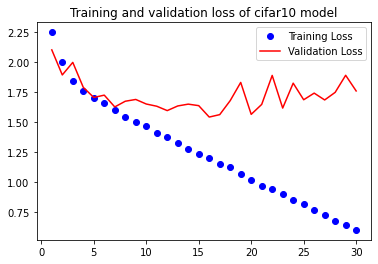

In [35]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) +1)

plt.plot(epochs, loss, 'bo', label= 'Training Loss')
plt.plot(epochs, val_loss, 'r', label= 'Validation Loss')
plt.title('Training and validation loss of cifar10 model')
plt.legend()
plt.savefig('Results/6_2a/Loss.png');

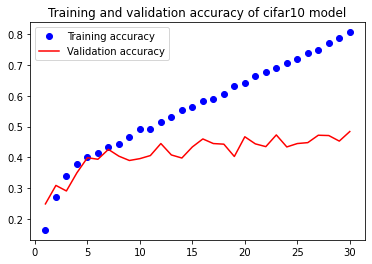

In [43]:
plt.plot(epochs, acc, 'bo', label= 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label= 'Validation accuracy')
plt.title('Training and validation accuracy of cifar10 model')
plt.legend()
plt.savefig('Results/6_2a/Accuracy.png');

In [38]:
model.save('Results/6_2a/model1.h5')

In [39]:
result = model.evaluate(x_test, y_test)
print(f'The model result for the test data is loss {result[0]} and accuracy {result[1]}')

313/313 [==============================] - 3s 11ms/step - loss: 1.7394 - accuracy: 0.4712
The model reult for the test data is loss 1.7394400835037231 and accuracy 0.47119998931884766


In [40]:
import numpy as np
import pandas as pd
preds = model.predict(x_test)
pred_class = np.argmax(preds, axis= 1)
act = np.argmax(y_test, axis= 1)
pred_df = pd.DataFrame({'Actual':act, 'Predicted':pred_class})
pred_df

,Actual,Predicted
0,3,3
1,8,1
2,8,9
3,0,8
4,6,5
...,...,...
9995,8,5
9996,3,6
9997,5,3
9998,1,4


In [41]:
pred_df.to_csv('Results/6_2a/predictions.csv')